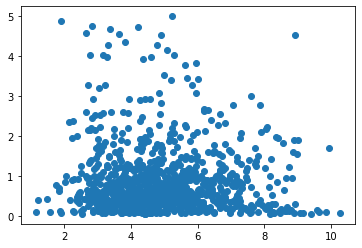

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)

ages = galaxy_properties['age']

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, ages)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)
svr = SVR(verbose=True)
cv = KFold(n_splits=5, shuffle=True, random_state=101)
# l_benchmark_lim = cross_validate(model, spectra, ages, cv = cv, scoring = 'neg_mean_squared_error', return_train_score=True)
# l_benchmark_lim

params = {
    'C': [0.01, 0.1, 1.0, 1, 10],
    'degree': [1, 3, 5, 7],
    'kernel': ['poly', 'rbf'],
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-3)]: Done 200 out of 200 | elapsed:  1.3min finished


[LibSVM]Best params, best score: 0.0675 {'C': 10, 'degree': 1, 'kernel': 'rbf'}


In [6]:
params = {
    'C': [1, 10, 50, 100, 100, 500, 1000],
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale', 0.1, 1.0, 10.0, 100.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-4, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done   8 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-4)]: Done  62 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-4)]: Done 152 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-4)]: Done 210 out of 210 | elapsed:   43.2s finished


[LibSVM]Best params, best score: 0.7018 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [8]:
params = {
    'C': [600, 700, 800, 900, 1000, 1100, 1200],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 1.0]
}

model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(X_train, y_train)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    3.2s


KeyboardInterrupt: 